In [3]:
pip install tensorflow --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.57.0-cp39-cp39-win_amd64.whl (4.3 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion=keras.datasets.fashion_mnist

In [2]:
(xtrain,ytrain), (xtest,ytest) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


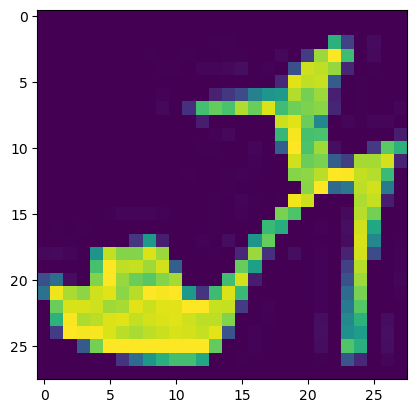

In [5]:
image = xtrain[9]
plt.imshow(image)

In [6]:
xtest.shape

(10000, 28, 28)

In [7]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]), keras.layers.Dense(300, activation='relu'), keras.layers.Dense(100, activation='relu'), keras.layers.Dense(10, activation = 'softmax')])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
xvalid, xtrain= xtrain[:5000]/255, xtrain[5000:]/255
yvalid, ytrain= ytrain[:5000]/255, ytrain[5000:]/255

In [11]:
xvalid.shape

(5000, 28, 28)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(xtrain,ytrain, epochs=30, validation_data=(xvalid,yvalid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0142 - accuracy: 0.1007 - val_loss: 0.0010 - val_accuracy: 0.0914
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 7.1529e-04 - accuracy: 0.1008 - val_loss: 4.8051e-04 - val_accuracy: 0.0914
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 3.9567e-04 - accuracy: 0.1008 - val_loss: 3.1265e-04 - val_accuracy: 0.0914
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 2.7209e-04 - accuracy: 0.1008 - val_loss: 2.3064e-04 - val_accuracy: 0.0914
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 2.0641e-04 - accuracy: 0.1008 - val_loss: 1.8237e-04 - val_accuracy: 0.0914
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 1.6581e-04 - accuracy: 0.1008 - val_loss: 1.5052e-04 - val_accuracy: 0.0914
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3830e-04 - accura

In [13]:
prova = xtest[:5]
predictions=model.predict(prova)
predictions

1/1 [==============================] - 0s 118ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
classi=np.argmax(predictions,axis=1)

In [15]:
classi

array([0, 0, 0, 0, 0], dtype=int64)